# Assignment 1

In [28]:
import numpy as np
np.array([0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5])

array([0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5])


## Question 1

In [29]:
def transition_matrix(n):
    matrix = np.zeros((n, n))
    rows, cols = np.indices((n,n))
    
    matrix[np.diag(rows, k=-1),np.diag(cols, k=-1)]=0.6 # With probability 0.6, it goes to state i+1
    matrix[0,0:n-1] += 0.1 # With probability 0.1, it will fall back to state i = 0.
    matrix[np.diag(rows, k=1),np.diag(cols, k=1)] +=0.3 # With probability 0.3, it goes to state i-1 if i is at least 1.
    matrix[0][0]+= 0.3 #  If i is instead 0 it stays at state 0.
    matrix[n-2,n-1]= 0 # since at state n-1 we dont use these operations , i canceled last operation for state n-1
    matrix[n-1,n-1]= 1. # At state n-1, instead of the above operations we stay at state n-1 with probability 1
    return matrix

In [32]:
#TESTING
transition_matrix(10)

array([[0.4, 0.4, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0. ],
       [0.6, 0. , 0.3, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.6, 0. , 0.3, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.6, 0. , 0.3, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.6, 0. , 0.3, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.6, 0. , 0.3, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0.3, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0.3, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.6, 1. ]])

## Question 2

In [33]:
#YOUR CODE HERE
def propagate(p0,k,tm):
    T = tm
    for i in range(k-1):
        T= T @ tm
    pk= T @ p0
    return pk

In [34]:
#TESTING
tm = transition_matrix(10)
p0 = np.zeros(10)
p0[0] = 1
pk = propagate(p0,30,tm)
pk

array([0.16029774, 0.13006664, 0.10561269, 0.08547506, 0.06947427,
       0.05552321, 0.04450658, 0.03281234, 0.02049648, 0.29573499])

## Question 3
### Part a

In [36]:
#YOUR CODE HERE
k= 1
p0 = np.zeros(10)
p0[0] = 1
pk0 = propagate(p0,k,tm) 

while pk0[9] < 0.50:
    k += 1
    pk0= propagate(p0,k,tm)
k, pk0[9] # number of states, the probability      

(50, 0.5027436822948339)

### Part b

In [37]:
#YOUR CODE HERE
def markow_chain_50(n):
    k=1
    tm = transition_matrix(n)
    p0 = np.zeros(n)
    p0[0] = 1
    pk = propagate(p0,k,tm)
    
    while pk[n-1] < 0.50:
        k += 1
        pk= propagate(pk,1,tm)
    return k

markow_chain_50(10)

50

### Part c

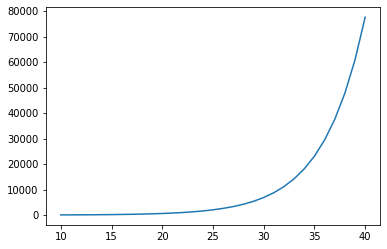

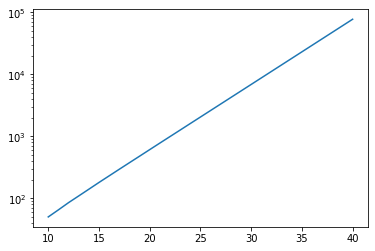

In [38]:
#YOUR CODE HERE
import matplotlib.pyplot as plt
x=range(10,41)
y=[0]*31

for i in x:
    y[i-10] = markow_chain_50(i)
plt.plot(x,y)
plt.savefig("qsn3c.png")
plt.show()
plt.semilogy(x,y)
plt.savefig("qsn3c_semilogy.png")

## Question 4
### Part a

In [40]:
import numpy.random as rnd

In [43]:
#YOUR CODE HERE
def sample(tm, s0):
    p0 = np.zeros(len(tm))
    p0[s0] = 1
    pk = propagate(p0,1,tm) # pk = [0.1, 0. , 0. , 0.3, 0. , 0.6, 0. , 0. , 0. , 0. ]
    return rnd.choice(range(len(tm)), p=pk) # p is probability distribution
sample(tm, 4)    

5

### Part b

In [44]:
#YOUR CODE HERE
def sample_k_steps(tm,k,s0):
    ret=[s0]
    for i in range(1,k+1):
        ret.append(sample(tm,ret[i-1]))
    return ret

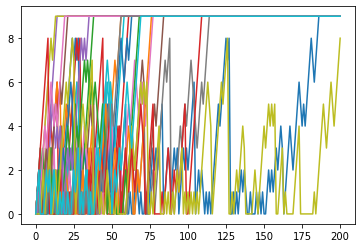

In [45]:
#TESTING
tm = transition_matrix(10)
k = 200
s0 = 0

for i in range(20):
    states = sample_k_steps(tm, k, s0)
    plt.plot(states)

plt.savefig("qsn4b.png")

## Question 5

In [51]:
#YOUR CODE HERE
def hitting_time_1_walk(tm,i,j):
    count=0
    while i != j:
        i = sample(tm, i)
        count +=1
    return count
hitting_time_1_walk(tm,2,6)

38

In [ ]:
#YOUR CODE HERE
n = 20
tm = transition_matrix(n)
arr = [hitting_time_1_walk(tm,0,n-1) for i in range(1000)]
arr

In [55]:
def proportion_at_most(arr, max_value):
    ret = [0] * (max_value+1)
    count=0
    for item in arr:
        count +=1
        if item <= max_value:
            ret[item] += 1
    ret[0]=ret[0]/count
    for i in range(1,max_value+1):
        ret[i] = ret[i]/count + ret[i-1]
    return ret

In [ ]:
prob1 = proportion_at_most(arr=arr, max_value = 2000)
prob1

In [57]:
prob2=np.zeros(2001)
p0=np.zeros(n)
p0[0] = 1
for k in range(2001):
    prob2[k] = propagate(p0,k,tm)[n-1]

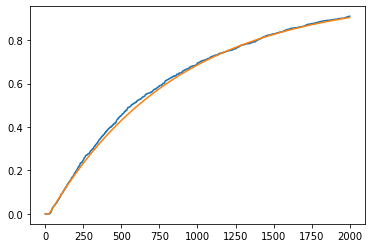

In [58]:
plt.plot(prob1)
plt.plot(prob2)
plt.savefig("qsn5.png")

They agree each other

## Question 6

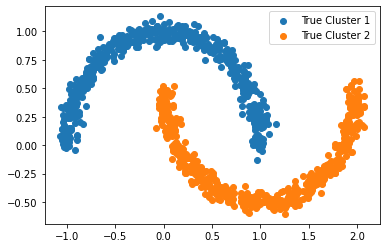

In [19]:
import sklearn.datasets

n = 1000
X,y = sklearn.datasets.make_moons(n,noise=0.05, random_state = 0)

plt.scatter(X[y==0, 0], X[y==0, 1],label="True Cluster 1")
plt.scatter(X[y==1, 0], X[y==1, 1],label="True Cluster 2")
    
    
plt.legend()

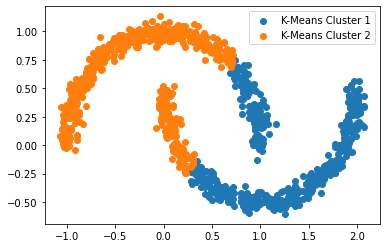

In [20]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, random_state=0)
kmeans_labels = model.fit(X).labels_

plt.scatter(X[kmeans_labels==0, 0], X[kmeans_labels==0, 1],label="K-Means Cluster 1")
plt.scatter(X[kmeans_labels==1, 0], X[kmeans_labels==1, 1],label="K-Means Cluster 2")
    
    
plt.legend()

### Part a

In [60]:
#YOUR CODE HERE
from math import exp
n=1000
A= np.zeros((n, n))
for i in range(n):
    for j in range(n):
        A[i,j]= exp(-10 * np.absolute(np.linalg.norm(X[i]-X[j])))
np.min(A)

1.679177168057234e-14

In [22]:
D =  np.diag(A.sum(axis=0))
L = D-A

In [23]:
#YOUR CODE HERE
def richardson(L,b,T=500): #in our later code, we will run for T = 500 iterations
    x = np.zeros(len(b))
    steplength = 0.03
    ret=[]
    for i in range(T):
        residual = b - L*x
        x = x + steplength * residual
        ret.append(np.absolute(np.linalg.norm(L*x-b)))
    return x, ret

### Part b

In [24]:
#YOUR CODE HERE
def agd(L,b,T=500):
    x_={0:np.zeros(len(b))}
    y_={0:np.zeros(len(b))}
    steplength = 0.03
    alpha = 0.9
    ret=[]
    for i in range(T):
        x_[i+1] = y_[i] + steplength*(b - L*y_[i])
        y_[i+1] = x_[i+1] + alpha * (x_[i+1] - x_[i])
        a = x_[i+1]
        ret.append(np.absolute(np.linalg.norm(L*a - b)))
        del x_[i]
        del y_[i]
    return x_[T],ret

In [61]:
#TESTING-- try using Richardson and AGD to solve the linear system Lx = v
np.random.seed(0)
v = np.random.rand(n)
v -= np.sum(v)/n

sol1a, sol1b = richardson(L,v,T=500)
sol2a,sol2b = agd(L,v,T=500)

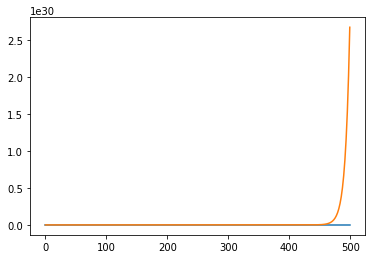

In [62]:
plt.plot(sol1b)
plt.plot(sol2b)
plt.savefig("qsn6b.png")